In [91]:
import numpy as np

def get_seq_dist(file_name):
    """
    Get sequence and distance matrix from the output file
    from Alphafold (*.rr).
    
    Args:
        file_name(str): Target file name.
    
    Returns:
        tuple:(distance, residue)
            distance(np.array): Numpy array for the distances between residues
            residues(str): Protein sequence(residues)
    """
    protein_f = open(file_name, 'r')    
    lines =  protein_f.readlines()
  
    idx = 0
    
    for i in range(len(lines)):
        cols = lines[i].split()
        idx += 1
        if cols[0] == 'MODEL':
            break

    residues = ''
    for i in range(idx, len(lines)):
        if len(lines[i].split()) > 2:
            idx = i
            break
        residues += lines[i].rstrip()
    distance = np.zeros((len(residues),len(residues)))
            
    for i in range(idx, len(lines)):
        cols = lines[i].split()
        if cols[0] == 'END':
            break
        distance[int(cols[0])-1][int(cols[1])-1] = float(cols[4])
    
    return distance + distance.T, residues


def load_alphafold_data(dir_name):
    import glob
    dists = []
    reses = []
    
    #files = glob.glob(dir_name+"/*.rr")
    files = glob.glob(dir_name+"/*")
    
    for file in files:
        dist, res = get_seq_dist(file)
        dists.append(dist)
        reses.append(res)
        
    return dists, reses

In [92]:
D, X = load_alphafold_data("rr_data")

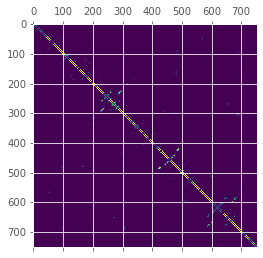

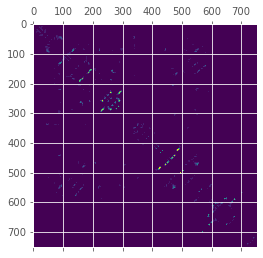

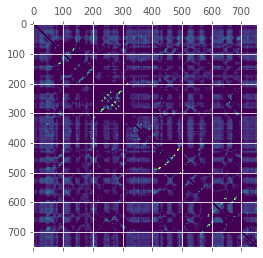

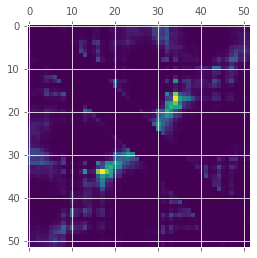

In [93]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

plt.matshow(D[0])
plt.matshow(D[1])
plt.matshow(D[2])
plt.matshow(D[3])